In [1]:
from scipy.optimize import linprog

# 1. 목적 함수 계수 (Maximize 5x + 3y => Minimize -5x - 3y)
# linprog는 최소화를 수행하므로 부호를 음수로 변경합니다.
c = [-5, -3]

# 2. 부등식 제약 조건 (좌변 계수 행렬 A, 우변 상수 벡터 b)
# 식 1: 2x + 1y <= 100
# 식 2: 1x + 2y <= 80
A = [
    [2, 1],
    [1, 2]
]
b = [100, 80]

# 3. 변수의 범위 (0 이상)
# (0, None)은 0 <= x < 무한대를 의미
x1_bounds = (0, None) # 책상
x2_bounds = (0, None) # 의자

# 4. 선형계획법 해결
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')

# 5. 결과 출력
if result.success:
    print("--- 최적 생산 계획 ---")
    print(f"책상 생산량: {result.x[0]:.1f}개")
    print(f"의자 생산량: {result.x[1]:.1f}개")

    # 목적 함수 값은 음수로 넣었으므로 다시 -1을 곱해 원상복구
    print(f"최대 하루 이익: {-result.fun:.1f}만 원")
else:
    print("해를 찾지 못했습니다.")

--- 최적 생산 계획 ---
책상 생산량: 40.0개
의자 생산량: 20.0개
최대 하루 이익: 260.0만 원


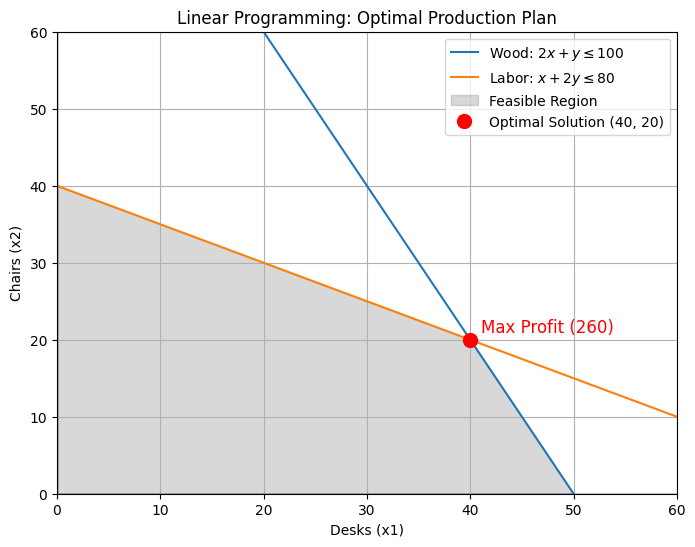

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. X축(책상)의 범위 설정 (0부터 60까지)
x = np.linspace(0, 60, 200)

# 2. 제약 조건 식 변형 (y = mx + c 형태)
# 조건 1 (목재): 2x + y <= 100  ->  y <= 100 - 2x
y1 = 100 - 2*x

# 조건 2 (노동): x + 2y <= 80   ->  2y <= 80 - x  ->  y <= (80 - x) / 2
y2 = (80 - x) / 2

# 3. 그래프 그리기 설정
plt.figure(figsize=(8, 6))

# 제약 조건 선 그리기
plt.plot(x, y1, label=r'Wood: $2x + y \leq 100$')
plt.plot(x, y2, label=r'Labor: $x + 2y \leq 80$')

# 4. 가능해 영역(Feasible Region) 색칠하기
# 두 조건(y1, y2) 중 더 낮은 값 아래쪽이면서, 0보다 큰 영역
y_feasible = np.minimum(y1, y2)
plt.fill_between(x, 0, y_feasible, where=(x >= 0) & (y_feasible >= 0),
                 color='gray', alpha=0.3, label='Feasible Region')

# 5. 최적해(Optimal Solution) 점 찍기 (40, 20)
plt.plot(40, 20, 'ro', markersize=10, label='Optimal Solution (40, 20)')
plt.text(41, 21, 'Max Profit (260)', fontsize=12, color='red')

# 6. 그래프 꾸미기
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel('Desks (x1)')
plt.ylabel('Chairs (x2)')
plt.title('Linear Programming: Optimal Production Plan')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# 출력
plt.show()